# Example: Plotting Ocean Model Velocity

#### Overview
In this notebook, we will examine the structure of the ocean currents at the surface of the ocean. We will use output from the ECCO Ocean State Estimate (Version 4).

#### Import Modules
First, import the modules required to access data from netCDF files and plot it:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

Matplotlib is building the font cache; this may take a moment.


### Plotting Surface Velocities
First, we will examine the mean velocity in the ocean gyres. Since velocity is a vector, it has both an eastward and northwest component. Begin by loading in the `EVEL` and `NVEL` fields -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model.

In [27]:
# read in the EVEL and VVEL files to a xarray dataset
# note that these files must be in the same folder as this notebook
ds_evel = xr.open_dataset('EVEL_2015_12.nc')
ds_nvel = xr.open_dataset('NVEL_2015_12.nc')
ds_nvel
ds_evel

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    EVEL       (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:25:43 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [28]:
ds_nvel

<xarray.Dataset> Size: 104MB
Dimensions:    (i: 720, k: 50, j: 360, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 6kB 0 1 2 3 4 5 6 7 ... 712 713 714 715 716 717 718 719
  * k          (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * j          (j) int64 3kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * time       (time) datetime64[ns] 8B 2015-12-16T12:00:00
    latitude   (j) float64 3kB ...
    longitude  (i) float64 6kB ...
    Z          (k) float32 200B ...
    timestep   (time) int64 8B ...
    time_bnds  (time, nv) datetime64[ns] 16B ...
Dimensions without coordinates: nv
Data variables:
    NVEL       (time, k, j, i) float64 104MB ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      -5.0
    date_created:                 Tue Aug 27 17:34:26 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

Next, will store our data into numpy arrays to facilitate nicer plots:

In [34]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_evel['EVEL'])
print(np.shape(evel))
nvel = np.array(ds_nvel['NVEL'])
longitude = np.array(ds_evel['longitude'])
longitude_N = np.array(ds_nvel['longitude'])
latitude = np.array(ds_evel['latitude'])
latitude_N = np.array(ds_nvel['latitude'])
print(np.shape(longitude))

ds_evel['Z']

(1, 50, 360, 720)
(720,)


<xarray.DataArray 'Z' (k: 50)> Size: 200B
[50 values with dtype=float32]
Coordinates:
  * k        (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    Z        (k) float32 200B ...
Attributes:
    units:      m
    positive:   down
    long_name:  vertical coordinate of cell center

Now, we will make a simple plot of the global velocity fields:

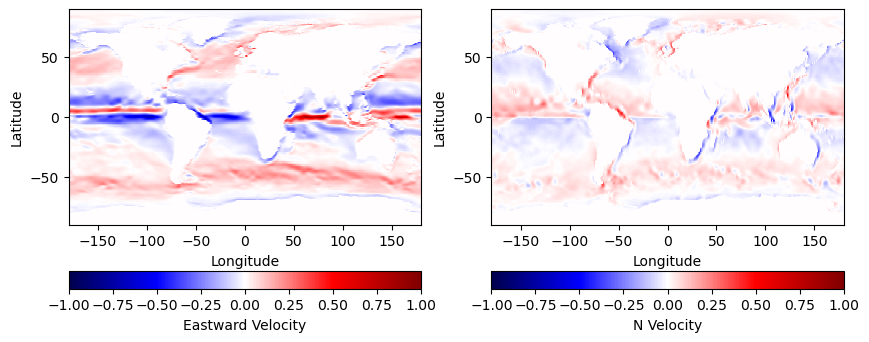

In [33]:
# make a plot of the velocity components (one for each)
# set the data bounds to +/- 1
# use a divergent colormap (such as seismic) to visualize the data
plt.figure(figsize=(10,4))
plt.subplot(1, 2 ,1)
plt.pcolormesh(longitude, latitude, evel[0, 0, :, :], vmin=-1, vmax=1, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Eastward Velocity', orientation='horizontal')

plt.subplot(1, 2 ,2)
plt.pcolormesh(longitude_N, latitude_N, nvel[0, 0, :, :], vmin=-1, vmax=1, cmap='seismic')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='N Velocity', orientation='horizontal')

plt.show()

### Questions:
1. What features of ocean circulation can be explained with the concept of a gyre? What specific features do you observe in the maps that support this general circulation pattern? 
2. What features of ocean circulation do you observe that CANNOT be explained with the concept of a gyre?

In [ ]:
# change this cell to a markdown and input your response here
1. 

2.